In [1]:
import pydot
import matplotlib.pyplot as plt

In [10]:
dot_file_path = 'Datasets/LesMiserables.dot'


with open(dot_file_path, 'r') as dot_file:
    dot_data = dot_file.read()

graph = pydot.graph_from_dot_data(dot_data)

nodes = graph[0].get_nodes()
edges = graph[0].get_edges()
print(edges.get_name())


for node_name, child_count in node_child_count.items():
    print(child_count)
    print("Node:", node_name, ", Number of child nodes:", child_count)  

AttributeError: 'list' object has no attribute 'get_name'

### COUNTING THE NUMBER OF CHILD NODES FOR EACH NODE

In [9]:
#COUNTING THE NUMBER OF CHILD NODES FOR EACH NODE
node_child_count = {node.get_name(): 0 for node in nodes}
node_childs = {node.get_name(): [] for node in nodes}

for edge in graph[0].get_edges():
    source = edge.get_source()
    destination = edge.get_destination()
    if source in node_child_count:
        node_child_count[source] += 1 
        node_childs[source].append(destination)
 
print(node_childs)


{'1': ['2'], '2': ['3', '4', '5', '6', '7', '8', '9', '10', '11'], '3': ['4', '11'], '4': ['11'], '5': [], '6': [], '7': [], '8': [], '9': [], '10': [], '11': ['12', '13', '14', '15', '16', '24', '25', '26', '27', '28', '29', '30', '32', '33', '34', '35', '36', '37', '38', '39', '44', '45', '49', '50', '52', '56', '59', '65', '69', '70', '71', '72', '73'], '12': [], '13': ['24'], '14': [], '15': [], '16': [], '24': ['17', '18', '19', '20', '21', '22', '23', '25', '26', '28', '30', '31', '32'], '25': ['26', '27', '28', '42', '43', '51', '69', '70', '71'], '26': ['27', '28', '40', '41', '42', '43', '49', '56', '69', '70', '71', '72', '76'], '27': ['18', '28', '44', '50', '52', '55', '56', '73'], '28': ['29', '30', '32', '34', '44', '49', '59', '69', '70', '71', '72', '73'], '29': ['45', '46'], '30': ['35', '36', '37', '38', '39'], '32': ['31'], '33': [], '34': [], '35': ['36', '37', '38', '39'], '36': ['37', '38', '39'], '37': ['38', '39'], '38': ['39'], '39': [], '44': [], '45': [], '49

### ORGANZING THE NODES THROUGHOUT THE GRAPH

In [5]:
node_positions = {node.get_name(): (0, 0) for node in nodes}
node_positions['1'] = (0, 0)

for node in nodes:
    max_distance = node_child_count[str(node.get_name())]-1
    for child in node_childs[str(node.get_name())]:
        parent_x = node_positions[str(node.get_name())][0]
        parent_y = node_positions[str(node.get_name())][1]
        if len(node_childs[str(node.get_name())]) == 1:
            child_x = parent_x + 2
            child_y = parent_y  # Assuming you want to keep the same y-coordinate
            node_positions[child] = (child_x, child_y)
        
        else:
            child_x = parent_x + 2
            child_y = parent_y + max_distance
            node_positions[child] = (child_x, child_y)
            max_distance -= 2
            
            
print(node_positions)          

{'1': (0, 0), '2': (2, 0), '3': (4, 8), '4': (6, 9), '5': (4, 4), '6': (4, 2), '7': (4, 0), '8': (4, -2), '9': (4, -4), '10': (4, -6), '11': (8, 9), '12': (10, 41), '13': (10, 39), '14': (10, 37), '15': (10, 35), '16': (10, 33), '24': (12, 39), '25': (14, 37), '26': (16, 45), '27': (18, 57), '28': (20, 62), '29': (22, 73), '30': (22, 71), '32': (22, 69), '33': (10, 15), '34': (22, 67), '35': (24, 75), '36': (26, 78), '37': (28, 80), '38': (30, 81), '39': (32, 81), '44': (22, 65), '45': (24, 74), '49': (22, 63), '50': (20, 58), '52': (22, 60), '56': (24, 57), '59': (26, 57), '65': (28, 55), '69': (24, 57), '70': (26, 59), '71': (28, 60), '72': (30, 60), '73': (22, 51), '17': (14, 51), '18': (16, 56), '19': (18, 60), '20': (20, 63), '21': (22, 65), '22': (24, 66), '23': (26, 66), '31': (24, 69), '42': (32, 61), '43': (34, 64), '51': (22, 62), '40': (26, 67), '41': (18, 51), '76': (34, 58), '55': (26, 63), '46': (24, 72), '53': (28, 67), '58': (34, 62), '63': (36, 63), '47': (24, 81), '48

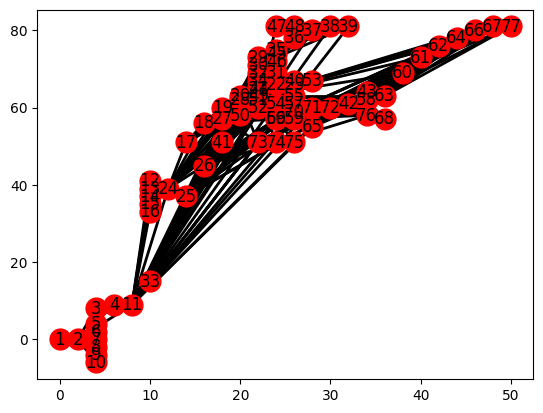

In [8]:
#HOW TO PLOT A GENERAL GRAPH
# Define node positions
#node_positions = {1: (0, 0),2: (1, 1), 3: (1, -1),4: (2, 0),5: (3, 0)}

# Define edges
#edges = node

# Draw edges
for edge in edges:
    start_node = edge.get_source()
    end_node = edge.get_destination()
    start_pos = node_positions[start_node]
    end_pos = node_positions[end_node]
    plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'k-',linewidth=2)  # 'k-' is black line

# Draw nodes
for node, pos in node_positions.items():
    plt.plot(pos[0], pos[1], 'ro',markersize=15)  # 'ro' is red circle
    plt.text(pos[0], pos[1], str(node), fontsize=12, ha='center', va='center')

# Set plot limits
#plt.xlim(-0.5, 3.5)
#plt.ylim(-1.5, 1.5)

# Turn off axis
#plt.axis('off')

# Show plot

plt.savefig('plots/plot.png')
plt.show()

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Example graph data
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5)])

# Use a graph layout algorithm for better positioning
pos = nx.spring_layout(G)

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='k', linewidths=2)

# Draw nodes with labels
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

# Set plot limits
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 0.5])

# Turn off axis
plt.axis('off')

# Show plot
plt.savefig('plots/plot.png')
plt.show()


TypeError: draw_networkx_edges() got an unexpected keyword argument 'linewidths'

# General Code

In [96]:
#for node in nodes:
 #   print("Node name:", node.get_name())
  #  print("Node label:", node.get_label())
   # print("Node attributes:", node.get_attributes())
    #print("Node shape:", node.get_shape())
    #print("Node style:", node.get_style())
    #print("Node position:", node.get_pos())
    
    
#for edge in edges:
 #   print("Source:", edge.get_source())
  #  print("Destination:", edge.get_destination())
   # print("Edge attributes:", edge.get_attributes())
    #print("Edge style:", edge.get_style())
    #print("Edge label:", edge.get_label())
    #print("Edge color:", edge.get_color())

In [ ]:
#COUNT THE NUMBER OF EDGES OF EACH NODE
node_edge_count = {node.get_name(): 0 for node in nodes}

for edge in graph[0].get_edges():
    s = edge.get_source()
    d = edge.get_destination()
    if s in node_edge_count:
        node_edge_count[s] += 1
    if d in node_edge_count:
        node_edge_count[d] += 1

# Print the number of edges for each node
for node_name, edge_count in node_edge_count.items():
    print("Node:", node_name, ", Number of edges:", edge_count)

# TRASH

In [103]:
#HOW TO CREATE THE DEFAULT LAYOUT
# Load the .dot file
#dot_file_path = 'your_file.dot'

# Read the .dot file
with open(dot_file_path, 'r') as dot_file:
    dot_data = dot_file.read()

# Create a graph object from the .dot data
graph = pydot.graph_from_dot_data(dot_data)

# Set the layout algorithm to "dot" (or any other supported layout type)
graph[0].set_graph_defaults(layout="dot")

# Render the graph with Graphviz
output_file_path = 'dot_layout_graph.png'
graph[0].write_png(output_file_path)

print("Graph with dot layout saved as:", output_file_path)

Graph with dot layout saved as: dot_layout_graph.png


In [87]:
#HOW TO CREATE THE RADIAL LAYOUT
graph[0].set_graph_defaults(layout="twopi")
output_file_path = 'radial_graph.png'
graph[0].write_png(output_file_path)